In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can a write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-clustering/uber_clean.csv


In [2]:
df = pd.read_csv("/kaggle/input/uber-clustering/uber_clean.csv")
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


In [3]:
import pandas as pd

from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
x = df[["Lat", "Lon"]]
x.head()

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047


In [5]:
model = KMeans(n_clusters=3, random_state=0, n_init=10)

y_kmeans = model.fit_predict(x)

In [6]:
cluster_assignments = model.fit_predict(x)

cluster_centers = model.cluster_centers_


In [7]:
distances = model.transform(x)


In [8]:
df["Cluster"] = cluster_assignments
df["Distance_to_C1"] = distances[:, 0]  # Distance to the first centroid
df["Distance_to_C2"] = distances[:, 1]  # Distance to the second centroid
df["Distance_to_C3"] = distances[:, 2]  # Distance to the third centroid

In [9]:
df['y'] = y_kmeans
df.head()

,Date/Time,Lat,Lon,Base,Date,Cluster,Distance_to_C1,Distance_to_C2,Distance_to_C3,y
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday,1,0.044692,0.012974,0.214995,1
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday,1,0.040222,0.037394,0.242815,1
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday,0,0.012745,0.052334,0.235922,0
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday,1,0.045380,0.017230,0.224858,1
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday,0,0.010544,0.064124,0.238596,0


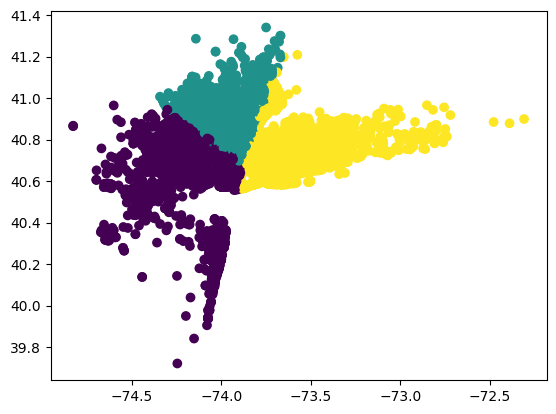

In [10]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])

Text(0, 0.5, 'Latitude')

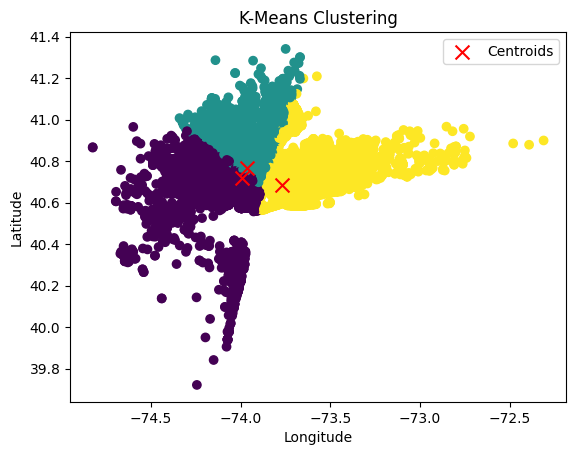

In [11]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], s=100, c='red', marker='x', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')